# 5-4分類（邏輯迴歸）

# 5-4-2邏輯迴歸的程式

In [1]:
import numpy as np
import matplotlib.pyplot as plt

讀入學習資料

In [3]:
train = np.loadtxt(open('/Users/shiliu/documents/images2.csv'), delimiter=',', skiprows=1)
train_x = train[:,0:2]
train_y = train[:,2]

In [4]:
train

array([[153., 432.,   0.],
       [220., 262.,   0.],
       [118., 214.,   0.],
       [474., 384.,   1.],
       [485., 411.,   1.],
       [233., 430.,   0.],
       [396., 321.,   1.],
       [484., 349.,   1.],
       [429., 259.,   1.],
       [286., 220.,   1.],
       [399., 433.,   0.],
       [403., 300.,   1.],
       [252.,  34.,   1.],
       [497., 372.,   1.],
       [379., 416.,   0.],
       [ 76., 163.,   0.],
       [263., 112.,   1.],
       [ 26., 193.,   0.],
       [ 61., 473.,   0.],
       [420., 253.,   1.]])

In [5]:
train_x

array([[153., 432.],
       [220., 262.],
       [118., 214.],
       [474., 384.],
       [485., 411.],
       [233., 430.],
       [396., 321.],
       [484., 349.],
       [429., 259.],
       [286., 220.],
       [399., 433.],
       [403., 300.],
       [252.,  34.],
       [497., 372.],
       [379., 416.],
       [ 76., 163.],
       [263., 112.],
       [ 26., 193.],
       [ 61., 473.],
       [420., 253.]])

In [6]:
train_y

array([0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1.])

初始化參數 

In [8]:
theta = np.random.rand(3)

##### 

標準化

In [9]:
mu = train_x.mean(axis=0)
sigma = train_x.std(axis=0)
def standardize(x):
    return ( x - mu ) /sigma

train_z = standardize(train_x)

In [10]:
def to_matrix(x):
    x0 = np.ones([x.shape[0], 1])
    return np.hstack([x0, x])

X = to_matrix(train_z)

繪製經標準化後的學習資料

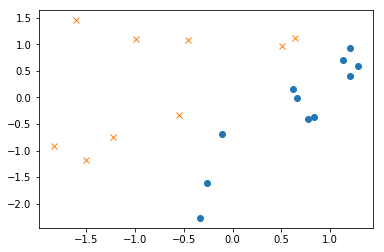

In [11]:
plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.show()

S型函數

In [12]:
def f(x):
    return 1 / (1+ np.exp(-np.dot(x, theta)))

# 5-4-2-參數更新式

學習率

In [13]:
ETA = 1e-3

重複次數 

In [14]:
epoch = 5000

重複學習

In [15]:
for _ in range(epoch):
    theta = theta - ETA * np.dot(f(X) - train_y, X)

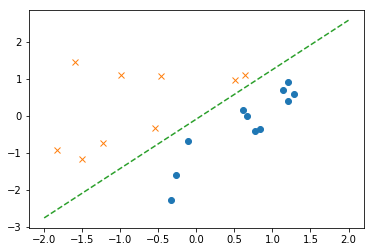

In [16]:
x0 = np.linspace(-2, 2, 100)

plt.plot(train_z[train_y == 1, 0], train_z[train_y == 1, 1], 'o')
plt.plot(train_z[train_y == 0, 0], train_z[train_y == 0, 1], 'x')
plt.plot(x0, -(theta[0] + theta[1] * x0) / theta[2], linestyle='dashed')
plt.show()

# 5-4-3驗證

驗證方法一：輸出值為 x 屬於橫長的機率

In [17]:
f(to_matrix(standardize([
    [200,100], #200x100的橫長圖像
    [100,200], #100x200的縱長圖像
])))

array([0.91814386, 0.02924911])

驗證方法二：輸出值 1 為分類至橫長 , 0 為分類至縱長

In [18]:
def classify(x):
    return (f(x) >= 0.5).astype(np.int)

In [19]:
classify(to_matrix(standardize([
    [200,100], #200x100的橫長圖像
    [100,200], #100x200的縱長圖像
])))

array([1, 0])